In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [6]:
my_data_dir = 'C:\\Users\\shubh\\Downloads\\waste-classification-data\\DATASET\\DATASET'

In [10]:

os.listdir(my_data_dir) 

['test', 'train']

In [11]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [12]:
os.listdir(test_path)

['organic', 'recyclable']

In [13]:
os.listdir(train_path)

['organic', 'recyclable']

In [14]:
os.listdir(train_path+'\\organic')[0]

'O_1.jpg'

In [15]:
para_cell = train_path+'\\organic'+'\\O_1.jpg'

In [16]:
para_img= imread(para_cell)

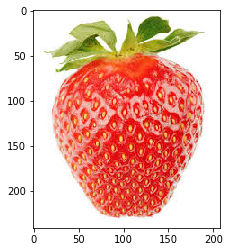

In [17]:
plt.imshow(para_img)

In [21]:
para_img.shape

(242, 208, 3)

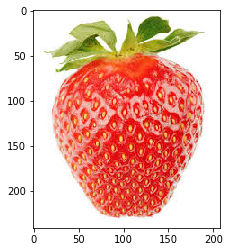

In [29]:
organicpath = train_path+'\\organic\\'+os.listdir(train_path+'organic')[0]
organicitem = imread(organicpath)
plt.imshow(organicitem)

**Let's check how many images there are.**

In [33]:
len(os.listdir(train_path+'\\organic'))

12565

In [34]:
len(os.listdir(train_path+'\\recyclable'))

9999

**Let's find out the average dimensions of these images.**

In [35]:
organicitem.shape

(242, 208, 3)

In [36]:
para_img.shape

(242, 208, 3)

In [37]:

dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\organic'):
    
    img = imread(test_path+'\\organic'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

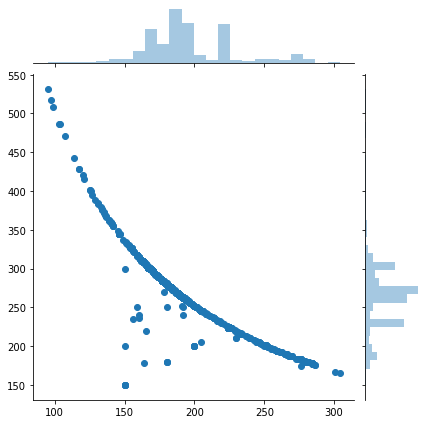

In [38]:
sns.jointplot(dim1,dim2)

In [39]:
np.mean(dim1)

196.01356174161313

In [40]:
np.mean(dim2)

262.38900785153464

In [41]:
image_shape = (196,262,3)

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shubh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [47]:
image_gen = ImageDataGenerator( # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

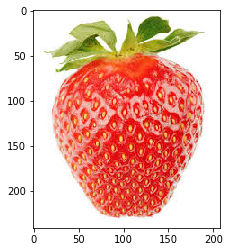

In [48]:
plt.imshow(para_img)

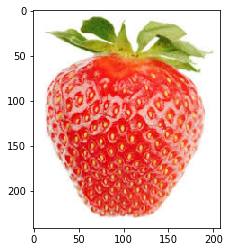

In [53]:
plt.imshow(image_gen.random_transform(para_img))

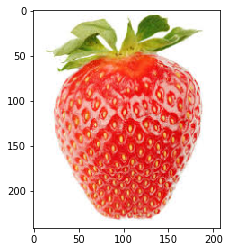

In [54]:
plt.imshow(image_gen.random_transform(para_img))

In [55]:
image_gen.flow_from_directory(train_path)

Found 22564 images belonging to 2 classes.


In [56]:
image_gen.flow_from_directory(test_path)

Found 2513 images belonging to 2 classes.


# Creating the Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [58]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 194, 260, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 130, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 128, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43648)             0

## Early Stopping

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [67]:
batch_size = 16
train_path

'C:\\Users\\shubh\\Downloads\\waste-classification-data\\DATASET\\DATASET\\train\\'

In [65]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 22564 images belonging to 2 classes.


In [66]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2513 images belonging to 2 classes.


In [68]:
train_image_gen.class_indices

{'organic': 0, 'recyclable': 1}

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1411/1411 [==============================] - 963s 683ms/step - loss: 0.4559 - acc: 0.8016 - val_loss: 0.3675 - val_acc: 0.8392
Epoch 2/20
1411/1411 [==============================] - 898s 636ms/step - loss: 0.3967 - acc: 0.8314 - val_loss: 0.3158 - val_acc: 0.8723
Epoch 3/20
1411/1411 [==============================] - 949s 672ms/step - loss: 0.3567 - acc: 0.8527 - val_loss: 0.2824 - val_acc: 0.8930
Epoch 4/20
1411/1411 [==============================] - 917s 650ms/step - loss: 0.3406 - acc: 0.8612 - val_loss: 0.2819 - val_acc: 0.8866
Epoch 5/20
1411/1411 [==============================] - 905s 641ms/step - loss: 0.3273 - acc: 0.8698 - val_loss: 0.3133 - val_acc: 0.8774
Epoch 6/20
1411/1411 [==============================] - 981s 695ms/step - loss: 0.3135 - acc: 0.8760 - val_loss: 0.2660 - val_acc: 0.8977
Epoch 7/20
1411/1411 [==============================] - 933s 661ms/step - loss: 0.3038 - acc: 0.8804 - val_loss: 0.2870 - val_acc: 0.8886
Epoch 8/20
1411/1411 [============

In [71]:
from tensorflow.keras.models import load_model
model.save('wasteclassifier.h5')

In [72]:
losses = pd.DataFrame(model.history.history)

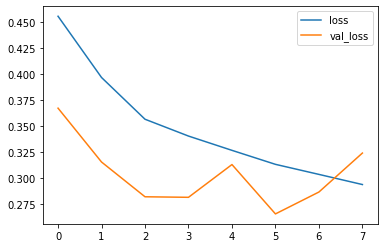

In [73]:
losses[['loss','val_loss']].plot()

In [74]:
model.metrics_names

['loss', 'acc']

In [75]:
model.evaluate_generator(test_image_gen)

[0.3226917194603365, 0.8869877]

In [76]:
from tensorflow.keras.preprocessing import image

In [77]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)

In [78]:
pred_probabilities

array([[1.2657046e-03],
       [2.5302172e-05],
       [2.5949270e-02],
       ...,
       [8.5754830e-01],
       [9.5116222e-01],
       [9.3487239e-01]], dtype=float32)

In [79]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [80]:
predictions = pred_probabilities > 0.5

In [81]:

predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1401
           1       0.97      0.78      0.86      1112

    accuracy                           0.89      2513
   macro avg       0.91      0.88      0.89      2513
weighted avg       0.90      0.89      0.89      2513



In [84]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1371,   30],
       [ 243,  869]], dtype=int64)

# Predicting on an Image

In [85]:

para_cell

'C:\\Users\\shubh\\Downloads\\waste-classification-data\\DATASET\\DATASET\\train\\\\organic\\O_1.jpg'

In [86]:
my_image = image.load_img(para_cell,target_size=image_shape)

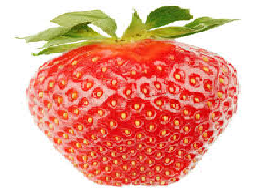

In [87]:
my_image

In [88]:
type(my_image)

PIL.Image.Image

In [89]:
my_image = image.img_to_array(my_image)

In [90]:
type(my_image)

numpy.ndarray

In [91]:
my_image.shape

(196, 262, 3)

In [92]:
my_image = np.expand_dims(my_image, axis=0)

In [93]:
my_image.shape

(1, 196, 262, 3)

In [98]:
model.predict_classes(my_image)

array([[0]])

In [95]:
train_image_gen.class_indices

{'organic': 0, 'recyclable': 1}

In [97]:
test_image_gen.class_indices


NameError: name 'pwd' is not defined